In [ ]:
import sys

In [ ]:
!{sys.executable} -m pip install osmnx
!{sys.executable} -m pip install plot
!{sys.executable} -m pip uninstall matplotlib
!{sys.executable} -m pip install matplotlib==3.1.3

In [ ]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import matplotlib
matplotlib.__version__

'3.2.2'

# Get the map of the streets in the Chicago
Get the map data by using `graph_from_place` function and convert the map data into graph data by using `graph_to_gdfs` function.

In [ ]:
# select the place
place = 'Chicago, Illinois, USA'

# get the graph from place
G = ox.graph_from_place(place, network_type='drive')

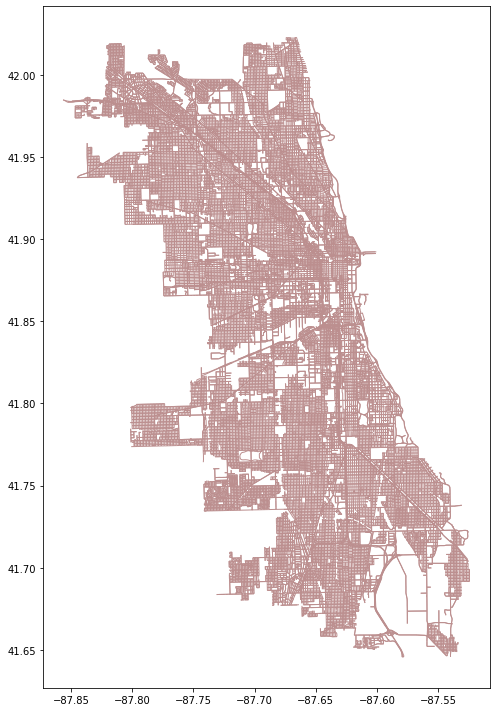

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# get the edges and node from graph
nodes,edges = ox.graph_to_gdfs(G)
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
plt.tight_layout()

In [ ]:
# get the basic status of the Chicago
basic_stats = ox.basic_stats(G)
basic_stats

{'n': 28696,
 'm': 76153,
 'k_avg': 5.307568999163647,
 'edge_length_total': 10397575.716999823,
 'edge_length_avg': 136.53533960579128,
 'streets_per_node_avg': 3.372839420128241,
 'streets_per_node_counts': {0: 0,
  1: 2065,
  2: 313,
  3: 11481,
  4: 14604,
  5: 174,
  6: 54,
  7: 3,
  8: 0,
  9: 0,
  10: 1,
  11: 0,
  12: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07196124895455813,
  2: 0.010907443546138835,
  3: 0.4000906049623641,
  4: 0.5089211039866184,
  5: 0.006063562865904656,
  6: 0.001881795372177307,
  7: 0.00010454418734318373,
  8: 0.0,
  9: 0.0,
  10: 3.4848062447727906e-05,
  11: 0.0,
  12: 3.4848062447727906e-05},
 'intersection_count': 26631,
 'street_length_total': 6852536.137999961,
 'street_segment_count': 48118,
 'street_length_avg': 142.4110756473661,
 'circuity_avg': 1.0135435696430175,
 'self_loop_proportion': 0.0012261523754104494}

In [ ]:
pd.DataFrame(nodes)

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
701660,41.983951,-87.849198,3,NaN,NaN,POINT (-87.84920 41.98395)
702090,41.983432,-87.817823,3,80,motorway_junction,POINT (-87.81782 41.98343)
25779161,41.900902,-87.660921,3,NaN,NaN,POINT (-87.66092 41.90090)
25779173,41.895018,-87.657114,3,50B,motorway_junction,POINT (-87.65711 41.89502)
25779174,41.894301,-87.655976,3,NaN,NaN,POINT (-87.65598 41.89430)
...,...,...,...,...,...,...
10080927065,41.961772,-87.655148,4,NaN,traffic_signals,POINT (-87.65515 41.96177)
10080927066,41.961775,-87.654748,4,NaN,traffic_signals,POINT (-87.65475 41.96177)
10080927071,41.961157,-87.654742,4,NaN,traffic_signals,POINT (-87.65474 41.96116)


In [ ]:
pd.DataFrame(edges)

osmid  oneway  \
u           v          key                                           
702090      261263104  0                          24536463    True   
            1223297118 0             [1000818941, 8220086]    True   
25779161    739968328  0                           4378009    True   
25779173    709393016  0    [24229922, 56716748, 56716749]    True   
            25779174   0                         906195924    True   
...                                                    ...     ...   
10091627166 261120630  0                          24086125   False   
            26098045   0                          31260674    True   
10112219263 705676129  0            [435329531, 320489615]   False   
            537965917  0                         320489615   False   
            261151950  0                        1105056040   False   

                                  highway   length  \
u           v          key                           
702090      261263104  0    motorway_link  322.463   
            1223297118 0         motorway  500.211   
25779161    739968328  0         motorway  354.287   
25779173    709393016  0    motorway_link  755.294   
            25779174   0         motorway  123.330   
...                                   ...      ...   
10091627166 261120630  0         tertiary   74.650   
            26098045   0    motorway_link  557.144   
10112219263 705676129  0          primary  124.015   
            537965917  0          primary  256.617   
            261151950  0      residential   78.433   

                                                                     geometry  \
u           v          key                                                      
702090      261263104  0    LINESTRING (-87.81782 41.98343, -87.81838 41.9...   
            1223297118 0    LINESTRING (-87.81782 41.98343, -87.81879 41.9...   
25779161    739968328  0    LINESTRING (-87.66092 41.90090, -87.66068 41.9...   
25779173    709393016  0    LINESTRING (-87.65711 41.89502, -87.65684 41.8...   
            25779174   0    LINESTRING (-87.65711 41.89502, -87.65651 41.8...   
...                                                                       ...   
10091627166 261120630  0    LINESTRING (-87.67054 41.83702, -87.67054 41.8...   
            26098045   0    LINESTRING (-87.67054 41.83702, -87.67041 41.8...   
10112219263 705676129  0    LINESTRING (-87.66810 41.83624, -87.66805 41.8...   
            537965917  0    LINESTRING (-87.66810 41.83624, -87.67041 41.8...   
            261151950  0    LINESTRING (-87.66810 41.83624, -87.66809 41.8...   

                           lanes        ref                  name maxspeed  \
u           v          key                                                   
702090      261263104  0     NaN        NaN                   NaN      NaN   
            1223297118 0       4       I 90    Kennedy Expressway   55 mph   
25779161    739968328  0       4  I 90;I 94    Kennedy Expressway   45 mph   
25779173    709393016  0       2        NaN                   NaN      NaN   
            25779174   0       4  I 90;I 94    Kennedy Expressway   45 mph   
...                          ...        ...                   ...      ...   
10091627166 261120630  0     NaN        NaN     South Wood Street      NaN   
            26098045   0     NaN        NaN                   NaN      NaN   
10112219263 705676129  0       6        NaN   South Archer Avenue      NaN   
            537965917  0     NaN        NaN   South Archer Avenue      NaN   
            261151950  0     NaN        NaN  South Paulina Street      NaN   

                           bridge tunnel width access junction area service  
u           v          key                                                   
702090      261263104  0      NaN    NaN   NaN    NaN      NaN  NaN     NaN  
            1223297118 0      NaN    NaN   NaN    NaN      NaN  NaN     NaN  
25779161    739968328  0      NaN    NaN   NaN    NaN     

In [ ]:
pd.DataFrame(edges).sort_values("length")

osmid  \
u          v          key                                                      
5846956864 4332992899 1                                            802378102   
                      0                                            435385190   
4332992899 5846956864 0                                            435385190   
                      1                                            802378102   
6489536420 6489536418 0                                            351294905   
...                                                                      ...   
287237987  287236713  0    [27878304, 27878305, 28239685, 28256509, 28239...   
261100026  261172154  0                                             24081209   
261172154  261100026  0                                             24081209   
287238171  709393174  0    [28239536, 28239537, 28207152, 28207153, 28239...   
709393174  287238171  0    [28207152, 28207153, 28239536, 28239537, 28239...   

                           oneway      highway    length  \
u          v          key                                  
5846956864 4332992899 1     False    secondary     0.412   
                      0     False    secondary     0.412   
4332992899 5846956864 0     False    secondary     0.412   
                      1     False    secondary     0.412   
6489536420 6489536418 0     False    secondary     1.068   
...                           ...          ...       ...   
287237987  287236713  0     False     motorway  3672.228   
261100026  261172154  0     False  residential  3849.447   
261172154  261100026  0     False  residential  3849.447   
287238171  709393174  0     False     motorway  5043.624   
709393174  287238171  0     False     motorway  5043.624   

                                                                    geometry  \
u          v          key                                                      
5846956864 4332992899 1    LINESTRING (-87.60670 41.81655, -87.60670 41.8...   
                      0    LINESTRING (-87.60670 41.81655, -87.60670 41.8...   
4332992899 5846956864 0    LINESTRING (-87.60670 41.81654, -87.60670 41.8...   
                      1    LINESTRING (-87.60670 41.81654, -87.60670 41.8...   
6489536420 6489536418 0    LINESTRING (-87.75805 41.89491, -87.75806 41.8...   
...                                                                      ...   
287237987  287236713  0    LINESTRING (-87.70083 41.93522, -87.70118 41.9...   
261100026  261172154  0    LINESTRING (-87.58406 41.70691, -87.58222 41.7...   
261172154  261100026  0    LINESTRING (-87.57534 41.67365, -87.57535 41.6...   
287238171  709393174  0    LINESTRING (-87.69497 41.93178, -87.69462 41.9...   
709393174  287238171  0    LINESTRING (-87.65924 41.89769, -87.65940 41.8...   

                          lanes        ref                        name  \
u          v          key                                                
5846956864 4332992899 1     NaN        NaN  South Cottage Grove Avenue   
                      0       3        NaN  South Cottage Grove Avenue   
4332992899 5846956864 0       3        NaN  South Cottage Grove Avenue   
                      1     NaN        NaN  South Cottage Grove Avenue   
6489536420 6489536418 0       4        NaN         West Chicago Avenue   
...                         ...        ...                         ...   
287237987  287236713  0       2  I 90;I 94               Express Lanes   
261100026  261172154  0     NaN        NaN   South Stony Island Avenue   
261172154  261100026  0     NaN        NaN   South Stony Island Avenue   
287238171  709393174  0       2  I 90;I 94               Express Lanes   
709393174  287238171  0       2  I 90;I 94               Express Lanes   

                          maxspeed bridge tunnel width access junction area  \
u          v          key                                                     
5846956864 4332992899 1        NaN    NaN    NaN   NaN    NaN      NaN  NaN   
        

In [ ]:
len(nodes), len(edges)

(28696, 76153)

# Find the nearest node to a single point

In [ ]:
Gp = ox.project_graph(G)

In [ ]:
# find the nearest node to a single point
node = ox.nearest_nodes(Gp, 41.605051, -88.0)
node

766962987

In [ ]:
# find the shortest path (by distance) between these nodes then plot it
orig = (41.838706, -87.725954)
dest = (42.004384, -87.674296)
orig_node = ox.distance.nearest_nodes(G, orig[1], orig[0])
dest_node = ox.distance.nearest_nodes(G, dest[1], dest[0])
route = ox.shortest_path(G, orig_node, dest_node)
fig, ax = ox.plot_graph_route(G, route, route_color="y", node_size=0)

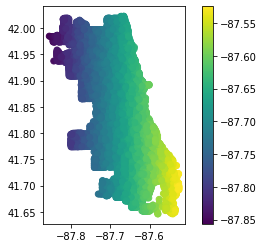

In [ ]:
nodes.plot("x", legend=True)

# Imputing travel speeds and times

In [ ]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [ ]:
nodes,edges = ox.graph_to_gdfs(G)

In [ ]:
# make the sample riskiness score in all edges
edges['riskiness'] = np.random.randint(1, 10, edges.shape[0])
edges

osmid  oneway  \
u           v          key                                           
702090      261263104  0                          24536463    True   
            1223297118 0             [1000818941, 8220086]    True   
25779161    739968328  0                           4378009    True   
25779173    709393016  0    [24229922, 56716748, 56716749]    True   
            25779174   0                         906195924    True   
...                                                    ...     ...   
10091627166 261120630  0                          24086125   False   
            26098045   0                          31260674    True   
10112219263 705676129  0            [435329531, 320489615]   False   
            537965917  0                         320489615   False   
            261151950  0                        1105056040   False   

                                  highway   length  \
u           v          key                           
702090      261263104  0    motorway_link  322.463   
            1223297118 0         motorway  500.211   
25779161    739968328  0         motorway  354.287   
25779173    709393016  0    motorway_link  755.294   
            25779174   0         motorway  123.330   
...                                   ...      ...   
10091627166 261120630  0         tertiary   74.650   
            26098045   0    motorway_link  557.144   
10112219263 705676129  0          primary  124.015   
            537965917  0          primary  256.617   
            261151950  0      residential   78.433   

                                                                     geometry  \
u           v          key                                                      
702090      261263104  0    LINESTRING (-87.81782 41.98343, -87.81838 41.9...   
            1223297118 0    LINESTRING (-87.81782 41.98343, -87.81879 41.9...   
25779161    739968328  0    LINESTRING (-87.66092 41.90090, -87.66068 41.9...   
25779173    709393016  0    LINESTRING (-87.65711 41.89502, -87.65684 41.8...   
            25779174   0    LINESTRING (-87.65711 41.89502, -87.65651 41.8...   
...                                                                       ...   
10091627166 261120630  0    LINESTRING (-87.67054 41.83702, -87.67054 41.8...   
            26098045   0    LINESTRING (-87.67054 41.83702, -87.67041 41.8...   
10112219263 705676129  0    LINESTRING (-87.66810 41.83624, -87.66805 41.8...   
            537965917  0    LINESTRING (-87.66810 41.83624, -87.67041 41.8...   
            261151950  0    LINESTRING (-87.66810 41.83624, -87.66809 41.8...   

                            speed_kph  travel_time lanes        ref  \
u           v          key                                            
702090      261263104  0         83.1         14.0   NaN        NaN   
            1223297118 0         88.5         20.3     4       I 90   
25779161    739968328  0         72.4         17.6     4  I 90;I 94   
25779173    709393016  0         83.1         32.7     2        NaN   
            25779174   0         72.4          6.1     4  I 90;I 94   
...                               ...          ...   ...        ...   
10091627166 261120630  0         40.4          6.7   NaN        NaN   
            26098045   0         83.1         24.1   NaN        NaN   
10112219263 705676129  0         49.2          9.1     6        NaN   
            537965917  0         49.2         18.8   NaN        NaN   
            261151950  0         39.2          7.2   NaN        NaN   

                                            name maxspeed bridge tunnel width  \
u           v          key                                                      
702090      261263104  0                     NaN      NaN    NaN    NaN   NaN   
            1223297118 0      Kennedy Expressway   55 mph    NaN    NaN   NaN   
25779161    739968328  0      Kennedy Expressway   45 mph    NaN    NaN   NaN   
25779173    709393016  0                     NaN      Na

In [ ]:
edges.head()

osmid  oneway  \
u        v          key                                           
702090   261263104  0                          24536463    True   
         1223297118 0             [1000818941, 8220086]    True   
25779161 739968328  0                           4378009    True   
25779173 709393016  0    [24229922, 56716748, 56716749]    True   
         25779174   0                         906195924    True   

                               highway   length  \
u        v          key                           
702090   261263104  0    motorway_link  322.463   
         1223297118 0         motorway  500.211   
25779161 739968328  0         motorway  354.287   
25779173 709393016  0    motorway_link  755.294   
         25779174   0         motorway  123.330   

                                                                  geometry  \
u        v          key                                                      
702090   261263104  0    LINESTRING (-87.81782 41.98343, -87.81838 41.9...   
         1223297118 0    LINESTRING (-87.81782 41.98343, -87.81879 41.9...   
25779161 739968328  0    LINESTRING (-87.66092 41.90090, -87.66068 41.9...   
25779173 709393016  0    LINESTRING (-87.65711 41.89502, -87.65684 41.8...   
         25779174   0    LINESTRING (-87.65711 41.89502, -87.65651 41.8...   

                         speed_kph  travel_time lanes        ref  \
u        v          key                                            
702090   261263104  0         83.1         14.0   NaN        NaN   
         1223297118 0         88.5         20.3     4       I 90   
25779161 739968328  0         72.4         17.6     4  I 90;I 94   
25779173 709393016  0         83.1         32.7     2        NaN   
         25779174   0         72.4          6.1     4  I 90;I 94   

                                       name maxspeed bridge tunnel width  \
u        v          key                                                    
702090   261263104  0                   NaN      NaN    NaN    NaN   NaN   
         1223297118 0    Kennedy Expressway   55 mph    NaN    NaN   NaN   
25779161 739968328  0    Kennedy Expressway   45 mph    NaN    NaN   NaN   
25779173 709393016  0                   NaN      NaN    yes    NaN   NaN   
         25779174   0    Kennedy Expressway   45 mph    NaN    NaN   NaN   

                        access junction area service  riskiness  
u        v          key                                          
702090   261263104  0      NaN      NaN  NaN     NaN          5  
         1223297118 0      NaN      NaN  NaN     NaN          4  
25779161 739968328  0      NaN      NaN  NaN     NaN          1  
25779173 709393016  0      NaN      NaN  NaN     NaN          1  
         25779174   0      NaN      NaN  NaN     NaN          4

In [ ]:
# see mean speed/time values by road type
edges = ox.graph_to_gdfs(G, nodes=False)
edges["highway"] = edges["highway"].astype(str)
edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['motorway_link', 'primary']",254.9,83.1,11.0
"['motorway_link', 'secondary']",401.3,83.1,17.4
"['motorway_link', 'secondary_link']",174.6,83.1,7.6
"['motorway_link', 'tertiary']",246.2,83.1,10.7
"['primary', 'secondary']",87.0,49.2,6.4
"['residential', 'living_street']",250.3,39.2,23.0
"['residential', 'tertiary']",225.5,39.2,20.7
"['residential', 'unclassified']",453.8,39.2,41.7
"['secondary', 'secondary_link']",183.7,49.0,13.5


In [ ]:
# same thing again, but this time pass in a few default speed values (km/hour)
# to fill in edges with missing `maxspeed` from OSM
hwy_speeds = {"residential": 35, "secondary": 50, "tertiary": 60}
G = ox.add_edge_speeds(G, hwy_speeds)
G = ox.add_edge_travel_times(G)

In [ ]:
# calculate two routes by minimizing travel distance vs travel time vs speed_kph(will be changed to the riskniss score)
orig = (41.838706, -87.725954)
dest = (42.004384, -87.674296)
orig_node = ox.distance.nearest_nodes(G, orig[1], orig[0])
dest_node = ox.distance.nearest_nodes(G, dest[1], dest[0])
route1 = ox.shortest_path(G, orig_node, dest_node, weight="length")
route2 = ox.shortest_path(G, orig_node, dest_node, weight="travel_time")
route3 = ox.shortest_path(G, orig_node, dest_node, weight="riskiness")

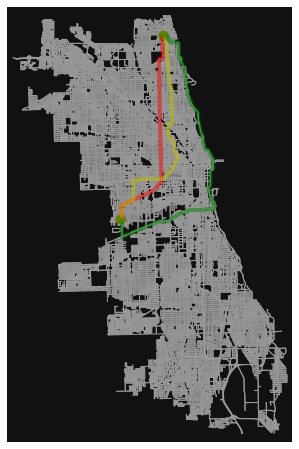

In [ ]:
# plot the routes
fig, ax = ox.plot_graph_routes(
    G, routes=[route1, route2, route3], route_colors=["r", "y", "g"], route_linewidth=6, node_size=0
)

In [ ]:
# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "length")))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "length")))
route3_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route3, "length")))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "travel_time")))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "travel_time")))
route3_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route3, "travel_time")))
print("Route 1 is", route1_length, "meters and takes", route1_time, "seconds.")
print("Route 2 is", route2_length, "meters and takes", route2_time, "seconds.")
print("Route 3 is", route3_length, "meters and takes", route3_time, "seconds.")
print("Route 1 is", route1_length, "meters and takes", route1_time, "seconds.")
print("Route 2 is", route2_length, "meters and takes", route2_time, "seconds.")
print("Route 3 is", route3_length, "meters and takes", route3_time, "seconds.")

Route 1 is 21444 meters and takes 1570 seconds.
Route 2 is 23933 meters and takes 1493 seconds.
Route 3 is 32060 meters and takes 1755 seconds.
Route 1 is 21444 meters and takes 1570 seconds.
Route 2 is 23933 meters and takes 1493 seconds.
Route 3 is 32060 meters and takes 1755 seconds.


# Get the information of the nodes in the shortest path
Get the information of the nodes in the shortest path, and then find the edges connected to those nodes. Calculate the mean of the riskiness score in the connected edges and select the 9 appropriate nodes in them for passing to the Google Map API

In [ ]:
# get the information about the nodes in route
route_nodes = nodes[nodes.index.isin(route3)]
route_nodes

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
26098008,41.847885,-87.622664,3,NaN,NaN,POINT (-87.62266 41.84789)
26098016,41.846962,-87.627591,3,NaN,NaN,POINT (-87.62759 41.84696)
26098027,41.847222,-87.636332,3,293A,motorway_junction,POINT (-87.63633 41.84722)
26098045,41.838923,-87.664546,3,NaN,NaN,POINT (-87.66455 41.83892)
26098097,41.860334,-87.617619,3,NaN,traffic_signals,POINT (-87.61762 41.86033)
...,...,...,...,...,...,...
4069458195,41.994581,-87.655522,3,NaN,traffic_signals,POINT (-87.65552 41.99458)
4277181079,41.828426,-87.724169,3,NaN,NaN,POINT (-87.72417 41.82843)
4335560700,41.947356,-87.642251,3,NaN,motorway_junction,POINT (-87.64225 41.94736)


In [ ]:
# get the information about the edges in route
route_edges = ox.utils_graph.get_route_edge_attributes(G, route3)
route_edges_df = pd.DataFrame(route_edges)

In [ ]:
# get the edges connected to the node in the route
edges_conncted_with_route_nodes = edges[edges.index.get_level_values('u').isin(route_nodes.index.tolist())]
len(edges_conncted_with_route_nodes.index.get_level_values('u').unique())

93

# Calutate the average riskiness score of the node of the route

In [ ]:
# get the mean of the connected edges
avg_of_node = edges_conncted_with_route_nodes.groupby([edges_conncted_with_route_nodes.index.get_level_values('u')]).mean().round(1)
avg_of_node_df = pd.DataFrame(avg_of_node)
avg_of_node_df.head()

,oneway,length,speed_kph,travel_time,riskiness
u,,,,,
26098008,1.0,20.9,83.5,0.9,4.0
26098016,1.0,423.6,83.5,18.3,9.0
26098027,1.0,650.6,83.3,28.2,3.5
26098045,1.0,559.1,83.5,24.1,5.0
26098097,0.5,337.1,52.4,23.8,5.5


In [ ]:
# add the information about the node: mean length, and riskiness
nodes_route = nodes[nodes.index.isin(avg_of_node_df.index)]
nodes_route['mean_edge'] = avg_of_node_df['length']
nodes_route['riskiness'] = avg_of_node_df['riskiness']
nodes_route

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,y,x,street_count,ref,highway,geometry,mean_edge,riskiness
osmid,,,,,,,,
26098008,41.847885,-87.622664,3,NaN,NaN,POINT (-87.62266 41.84789),20.9,4.0
26098016,41.846962,-87.627591,3,NaN,NaN,POINT (-87.62759 41.84696),423.6,9.0
26098027,41.847222,-87.636332,3,293A,motorway_junction,POINT (-87.63633 41.84722),650.6,3.5
26098045,41.838923,-87.664546,3,NaN,NaN,POINT (-87.66455 41.83892),559.1,5.0
26098097,41.860334,-87.617619,3,NaN,traffic_signals,POINT (-87.61762 41.86033),337.1,5.5
...,...,...,...,...,...,...,...,...
4069458195,41.994581,-87.655522,3,NaN,traffic_signals,POINT (-87.65552 41.99458),103.9,8.7
4277181079,41.828426,-87.724169,3,NaN,NaN,POINT (-87.72417 41.82843),277.2,5.0
4335560700,41.947356,-87.642251,3,NaN,motorway_junction,POINT (-87.64225 41.94736),391.4,4.0


# Selcet the 9 nodes to transfer to Google API

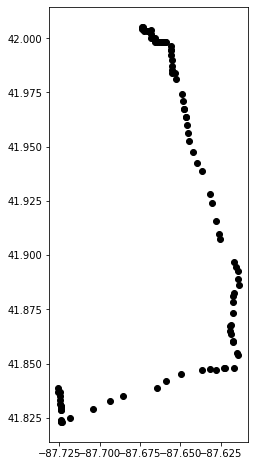

In [ ]:
# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes_route.plot(ax=ax, facecolor='black')